#  Write a program to evaluate predictive models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df=pd.read_csv("Student_grades_data.csv")
df.head()

,Time_to_Study,Grades
0,1,1.5
1,5,2.7
2,7,3.1
3,3,2.1
4,2,1.8


In [35]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [36]:
print(X[0:20])

[[ 1]
 [ 5]
 [ 7]
 [ 3]
 [ 2]
 [ 9]
 [ 6]
 [12]
 [11]
 [ 2]
 [ 4]
 [ 8]
 [13]
 [ 9]
 [14]
 [10]
 [ 6]
 [12]
 [ 1]
 [ 4]]


In [37]:
y

array([1.5, 2.7, 3.1, 2.1, 1.8, 3.9, 2.9, 4.5, 4.3, 1.8, 2.4, 3.5, 4.8,
       3.9, 5. , 4.1, 2.9, 4.5, 1.5, 2.4, 5. , 4.1, 4.3, 2.4, 2.7, 3.5,
       1.5, 1.8, 2.1, 3.1, 3.5, 5. , 3.1, 3.5, 1.5, 1.8, 2.1, 2.4, 2.7,
       2.9, 3.1, 3.5, 3.9, 4.1, 4.3, 4.5, 4.8, 5. , 3.5, 1.8])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [39]:
y_test

array([2.1, 3.5, 2.4, 3.5, 3.1, 1.8, 2.7, 5. , 4.3, 1.8, 3.5, 1.8, 1.5,
       1.5, 1.5])

In [40]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

In [41]:
#Predicted grade scores from test dataset
y_predict = LinReg.predict(X_test)
y_predict

array([2.11571229, 3.46772579, 2.38611499, 3.46772579, 3.19732309,
       1.84530959, 2.65651769, 5.09014199, 4.27893389, 1.84530959,
       3.46772579, 1.84530959, 1.57490689, 1.57490689, 1.57490689])

In [42]:
#Actual grade scores from test dataset
y_test

array([2.1, 3.5, 2.4, 3.5, 3.1, 1.8, 2.7, 5. , 4.3, 1.8, 3.5, 1.8, 1.5,
       1.5, 1.5])

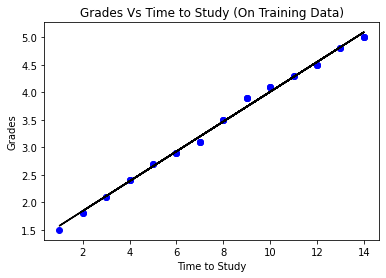

In [43]:
#Grades Vs Time to Study visualization on Training Data
plt.scatter(X_train, y_train, color='Blue')
plt.plot(X_train, LinReg.predict(X_train), color='Black')
plt.title('Grades Vs Time to Study (On Training Data)')
plt.xlabel('Time to Study')
plt.ylabel('Grades')
plt.show()

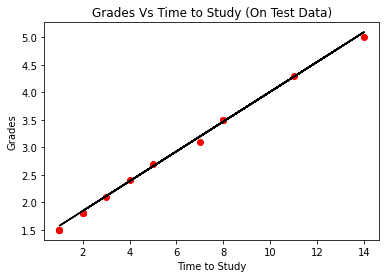

In [44]:
#Grades Vs Time to Study visualization on Test Data
plt.scatter(X_test, y_test, color='Red')
plt.plot(X_train, LinReg.predict(X_train), color='Black')
plt.title('Grades Vs Time to Study (On Test Data)')
plt.xlabel('Time to Study')
plt.ylabel('Grades')
plt.show()


In [45]:
#Model Evaluation using R-Square
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict)
print('R-Square Error:', r_square)

R-Square Error: 0.997283498148368


In [46]:
#Model Evaluation using Mean Square Error (MSE)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))

Mean Squared Error: 0.003099226779173007


In [47]:
#Model Evaluation using Root Mean Square Error (RMSE)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Root Mean Squared Error: 0.055670699467251235


In [48]:
#Model Evaluation using Mean Absolute Error (MAE)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))

Mean Absolute Error: 0.0492721911855992


In [49]:
#Model Evaluation using Median Absolute Error
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_predict))

Median Absolute Error: 0.04530959031657411


In [20]:
from sklearn.datasets import load_iris
iris = load_iris()

In [21]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [25]:
X = df.drop(['target','flower_name'], axis='columns')
Y = df.target

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [27]:
from sklearn import tree 
dt =tree.DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, Y_train)

dt.score(X_test,Y_test)
Y_pred = dt.predict(X_test)
dt.score(X_test,Y_test)

1.0

In [28]:
#Confusion Matix:
from sklearn.metrics import confusion_matrix
a=confusion_matrix(Y_test,Y_pred)
a

array([[ 8,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 12]], dtype=int64)

In [29]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [30]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [31]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [32]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9762374461979914 0.9233769727403157
